In [2]:
import geopandas as gpd
from shapely.geometry import Polygon

ModuleNotFoundError: No module named 'geopandas'

In [3]:
# Laster inn geojson-filen
gdf = gpd.read_file(r"C:\Users\johan\OneDrive\Skrivebord\fkb-case\fkb-case\geometri.geojson")
# Reprojiser til UTM32 (EPSG_25832) for å kunne måle avstand i meter
gdf = gdf.to_crs(epsg=25832)

NameError: name 'gpd' is not defined

In [4]:
feil_objekter = [] #liste til å lagre objekter med feil

# iterer gjennom hvert objekt og sjekker topologi
for i, geom1 in enumerate(gdf.geometry):
    for j, geom2 in enumerate(gdf.geometry):
        if i >= j:
            continue
            
        # sjekk om objektene krysser hverandre uten å berøre
        if geom1.intersects(geom2) and not geom1.touches(geom2):
            feil_objekter.append(geom1)
            feil_objekter.append(geom2)
            
        # sjekk om objektene er for nærme hverandre (terskel på 1 meter)
        if geom1.distance(geom2) < 1:
            feil_objekter.append(geom1)
            feil_objekter.append(geom2)
            
#lagre feil objekter i ny geodataframe
feil_gdf = gpd.GeoDataFrame(geometry=feil_objekter, crs="EPSG:25832")

In [6]:
feil_gdf.to_file(r"C:\Users\johan\OneDrive\Skrivebord\fkb-case\fkb-case\johanna_hellem-hansen/feil_objekter.geojson", driver="GeoJSON")

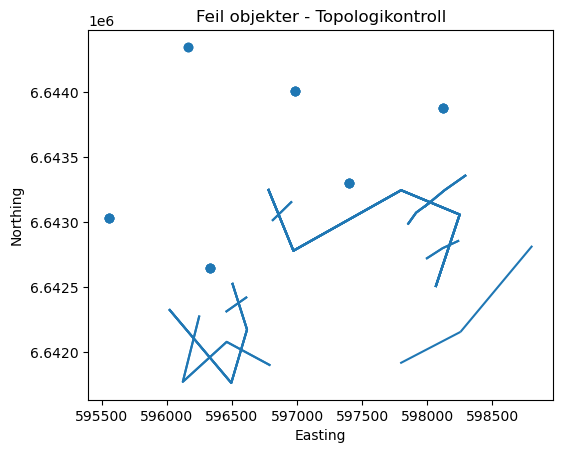

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Last inn feil_objekter.geojson-filen
feil_gdf = gpd.read_file(r"C:\Users\johan\OneDrive\Skrivebord\fkb-case\fkb-case\johanna_hellem-hansen/feil_objekter.geojson")

# Plott filen
feil_gdf.plot()
plt.title("Feil objekter - Topologikontroll")
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.show()